In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/shoaibb/Jupyter_Data_Analysis/master/Data.csv',sep=',')

In [3]:
df.head()

,Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
0,10/03/2012 12:00:00 AM,4.0,9.0
1,10/03/2012 01:00:00 AM,4.0,6.0
2,10/03/2012 02:00:00 AM,1.0,1.0
3,10/03/2012 03:00:00 AM,2.0,3.0
4,10/03/2012 04:00:00 AM,6.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41568 entries, 0 to 41567
Data columns (total 3 columns):
Date                            41568 non-null object
Fremont Bridge West Sidewalk    41560 non-null float64
Fremont Bridge East Sidewalk    41560 non-null float64
dtypes: float64(2), object(1)
memory usage: 974.3+ KB


In [12]:
df['Date'] = pd.to_datetime(df['Date'],format=('%d%m%Y'))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41568 entries, 0 to 41567
Data columns (total 3 columns):
Date                            41568 non-null datetime64[ns]
Fremont Bridge West Sidewalk    41560 non-null float64
Fremont Bridge East Sidewalk    41560 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 974.3 KB


In [14]:
df.head()

,Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
0,2012-10-03,4.0,9.0
1,2012-10-03,4.0,6.0
2,2012-10-03,1.0,1.0
3,2012-10-03,2.0,3.0
4,2012-10-03,6.0,1.0


In [16]:
df.set_index('Date',inplace=True)

In [17]:
df.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03,4.0,9.0
2012-10-03,4.0,6.0
2012-10-03,1.0,1.0
2012-10-03,2.0,3.0
2012-10-03,6.0,1.0


In [20]:
df.isnull().sum()

Fremont Bridge West Sidewalk    8
Fremont Bridge East Sidewalk    8
dtype: int64

In [21]:
# fill the mean
def mean_fill(x):
    x = x.fillna(x.mean())
    return  x
df = df.apply(lambda x:mean_fill(x))

In [22]:
df.isnull().sum()

Fremont Bridge West Sidewalk    0
Fremont Bridge East Sidewalk    0
dtype: int64

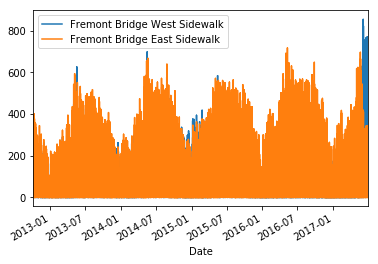

In [24]:
df.plot()

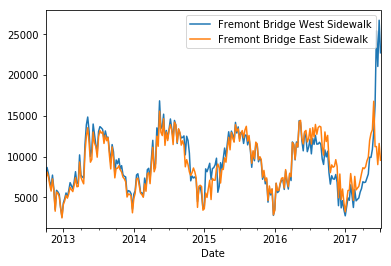

In [25]:
df.resample('W').sum().plot() # Weekly visualization

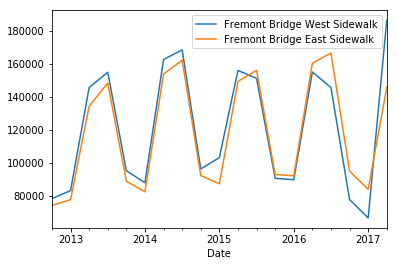

In [26]:
df.resample('Q').sum().plot() # quarterly visualization

Let's see if there's any sort of annual trend in the number of riders, any sort of annual growth or decline and ridership. We can create a rolling window. Resample it for days & Weeks to see the annual Trends and growth

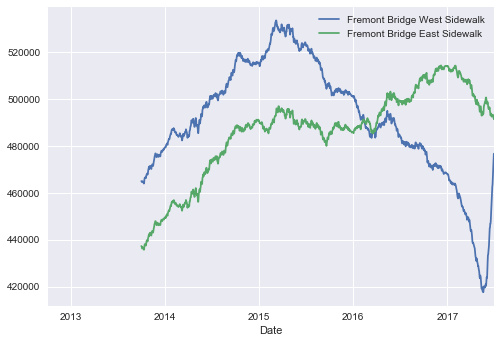

In [30]:
df.resample('D').sum().rolling(365).sum().plot() # seaborn visualization

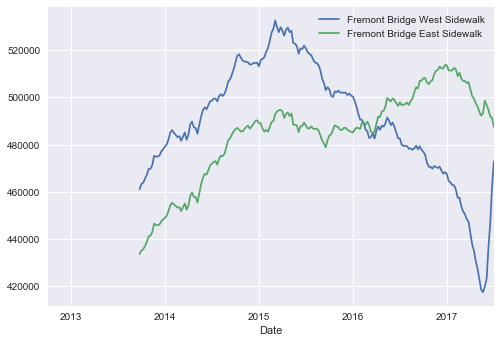

In [31]:
df.resample('W').sum().rolling(52).sum().plot()

(0, 538381.62182386906)

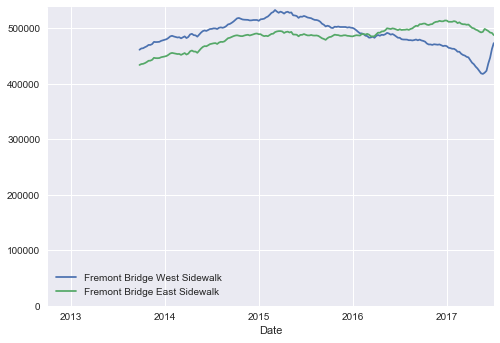

In [33]:
ax  = df.resample('W').sum().rolling(52).sum().plot()
ax.set_ylim(0,None)

df['Total'] = df['Fremont Bridge West Sidewalk']+df['Fremont Bridge East Sidewalk'] # adding both the side of walking

Let's see if there's any sort of annual trend in the number of riders, any sort of annual growth or decline and ridership. We can create a rolling window. Resample it for days & Weeks to see the annual Trends and growth

(0, 1059571.9625264679)

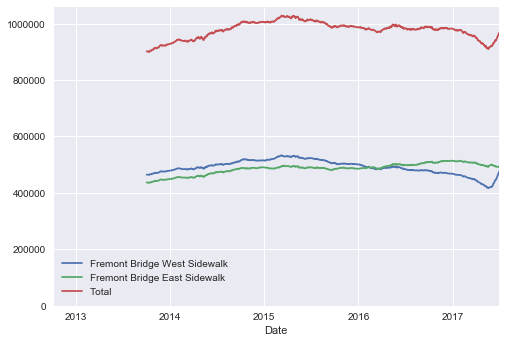

In [38]:
ax = df.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None)


We can see that somehow that the East Side and west side of the bridge have kind of slipped a little bit, i.e., the trends are reversed so that the the total counts of biker bikes across the bridge hover right around one million per year or something like that. That's been pretty consistent for the past few years plus or minus a few percent.

Another thing that we can do is that we can take a look at the trend within individual days. So we will take a look at "group by" here and let's group by the time of day and take the mean and then plot it to see what that looks like

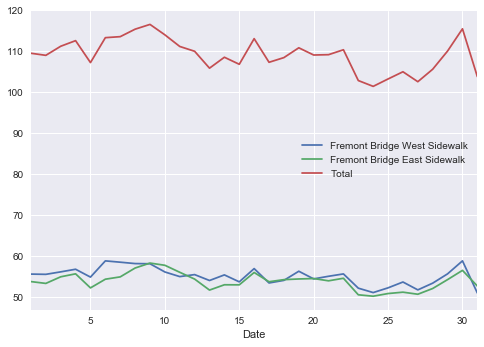

In [44]:
df.groupby(df.index.day).mean().plot()